In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import scipy.stats as sps


In [206]:
data = np.array([12.7, 14.3, 13.8,  13.2, 12.6, 15.1, 14.2, 12.9, 13.3, 12.8, 13.5, 13.8, 12.7, 12.9, 13.1, 14.5,13.3,13.7,12.1,13.6,13.7,13.1 ,13.8,13.1,12.1,13.6,12.8,12.7,11.7,12.9])
data

array([12.7, 14.3, 13.8, 13.2, 12.6, 15.1, 14.2, 12.9, 13.3, 12.8, 13.5,
       13.8, 12.7, 12.9, 13.1, 14.5, 13.3, 13.7, 12.1, 13.6, 13.7, 13.1,
       13.8, 13.1, 12.1, 13.6, 12.8, 12.7, 11.7, 12.9])

In [207]:
print ("This is the minimum number:", min(data))
print ("This is the maximum number:", max(data))
print ("This is the mean number:", sum(data)/len(data))


This is the minimum number: 11.7
This is the maximum number: 15.1
This is the mean number: 13.253333333333336


In [208]:
mean=np.mean(data)
var=np.var(data)
std=np.sqrt(var)

In [209]:
print("This is the standard deviation:", std)
print("This is var:", var)
print("This is mean:", mean)


This is the standard deviation: 0.7265137453773481
This is var: 0.5278222222222223
This is mean: 13.253333333333332


In [210]:
x=np.linspace(min(data), max(data),1000)

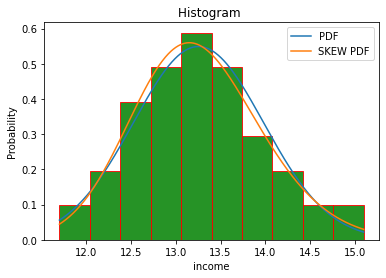

In [211]:
y_pdf=sps.norm.pdf(x,mean,std)
y_skew_pdf=sps.skewnorm.pdf(x,*sps.skewnorm.fit(data))
l1,=plt.plot(x,y_pdf, label='PDF')
l2,=plt.plot(x,y_skew_pdf, label='SKEW PDF')
n, bins,patches=plt.hist(data, 10,density=True,facecolor='g',edgecolor='red', alpha=0.85)
plt.xlabel('income')
plt.ylabel('Probability')
plt.title('Histogram ')
plt.legend((l1,l2),(l1.get_label(), l2.get_label()), loc='upper right')

plt.show()


In [212]:
mean

13.253333333333332

(array([1., 2., 4., 5., 6., 5., 3., 2., 1., 1.]),
 array([11.7 , 12.04, 12.38, 12.72, 13.06, 13.4 , 13.74, 14.08, 14.42,
        14.76, 15.1 ]),
 <BarContainer object of 10 artists>)

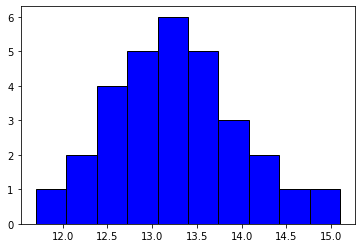

In [213]:
plt.hist(data,color = 'blue', edgecolor = 'black',
         bins = 10)

In [214]:
import seaborn as sns


C:\Users\maks-\anaconda3\envs\my\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

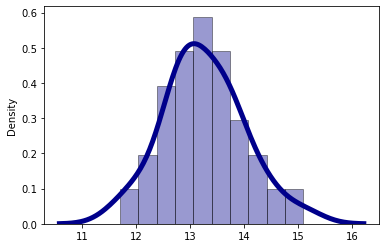

In [215]:
sns.distplot(data, hist=True, kde=True, 
             bins=10, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 5})

In [216]:
print('normality =', sps.normaltest(data))


normality = NormaltestResult(statistic=0.992241343246913, pvalue=0.6088881611166078)


C:\Users\maks-\anaconda3\envs\my\lib\site-packages\scipy\stats\_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


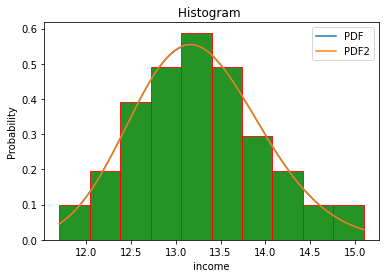

In [217]:
x=np.linspace(min(data), max(data),1000)
y_pdf=sps.gamma.pdf(x,*sps.gamma.fit(data))
z_pdf=sps.f.pdf(x,*sps.f.fit(data))
l1,=plt.plot(x,y_pdf, label='PDF')
l2,=plt.plot(x,z_pdf, label='PDF2')
n, bins,patches=plt.hist(data, 10,density=True,facecolor='g',edgecolor='red', alpha=0.85)
plt.xlabel('income')
plt.ylabel('Probability')
plt.title('Histogram ')
plt.legend((l1,l2),(l1.get_label(), l2.get_label()), loc='upper right')

plt.show()

In [218]:
x=np.linspace(min(data), max(data),10)
sorted_vals = np.sort(data)
from math import isclose

def count_in_range(vals, min, max):
    return sum(1 for x in vals if min < x < max or isclose(x, max) or isclose(x, min))
f_obs = []
f_exp = []
cdf = sps.gamma.cdf(x,*sps.gamma.fit(data))
for i in range(1,len(x)):
    f_obs.append(count_in_range(sorted_vals,x[i-1],x[i]))
    f_exp.append((cdf[i]-cdf[i-1])*len(data))
sps.chisquare(f_obs,f_exp)


ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
0.0197185993131597